In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import welch
from IPython.display import Audio, display

# Filenames
file_stet = "wav_rawdata_stet_data.wav"
file_plastic = "wav_rawdata_plastic_thin_throat.wav"

In [3]:
# Load audio files
y_stet, sr_stet = librosa.load(file_stet, sr=None)
y_plastic, sr_plastic = librosa.load(file_plastic, sr=None)

print("Stethoscope data:", len(y_stet)/sr_stet, "seconds,", sr_stet, "Hz")
print("Plastic thin throat data:", len(y_plastic)/sr_plastic, "seconds,", sr_plastic, "Hz")

# Normalize for fair comparison
y_stet = y_stet / np.max(np.abs(y_stet))
y_plastic = y_plastic / np.max(np.abs(y_plastic))

Stethoscope data: 20.000507936507937 seconds, 15750 Hz
Plastic thin throat data: 20.000507936507937 seconds, 15750 Hz


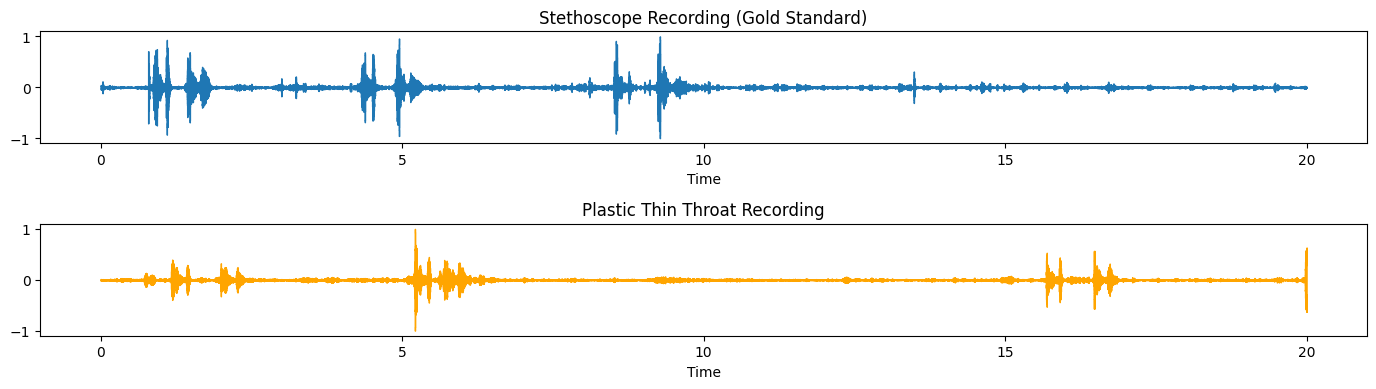

In [4]:
plt.figure(figsize=(14, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_stet, sr=sr_stet)
plt.title("Stethoscope Recording (Gold Standard)")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_plastic, sr=sr_plastic, color='orange')
plt.title("Plastic Thin Throat Recording")
plt.tight_layout()
plt.show()

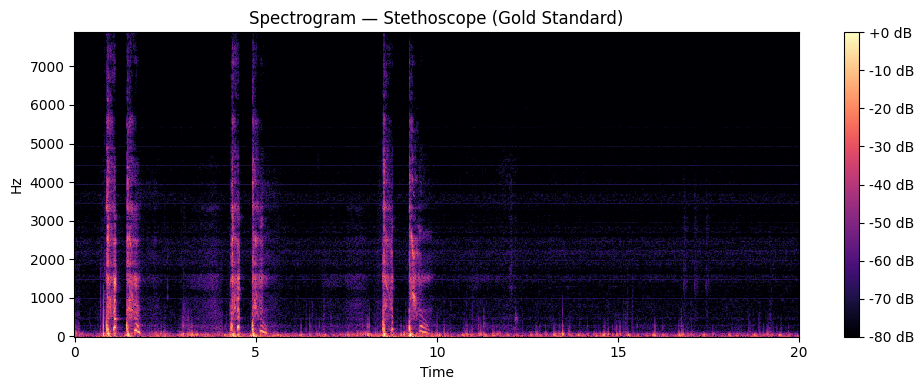

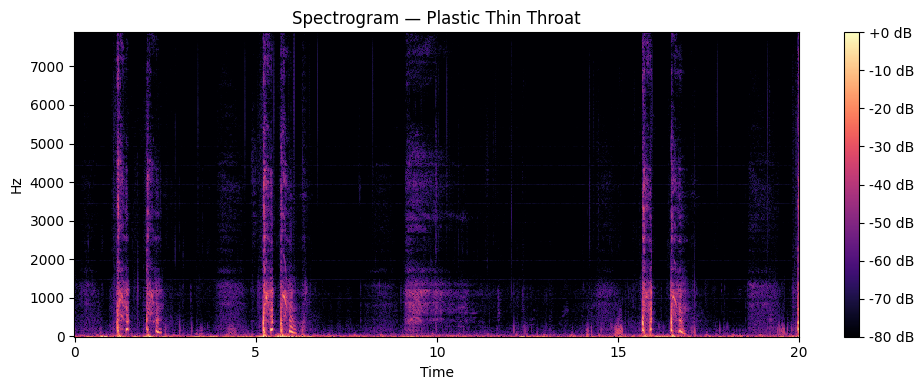

In [5]:
def plot_spectrogram(y, sr, title):
    S = librosa.stft(y, n_fft=1024, hop_length=256)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_spectrogram(y_stet, sr_stet, "Spectrogram — Stethoscope (Gold Standard)")
plot_spectrogram(y_plastic, sr_plastic, "Spectrogram — Plastic Thin Throat")


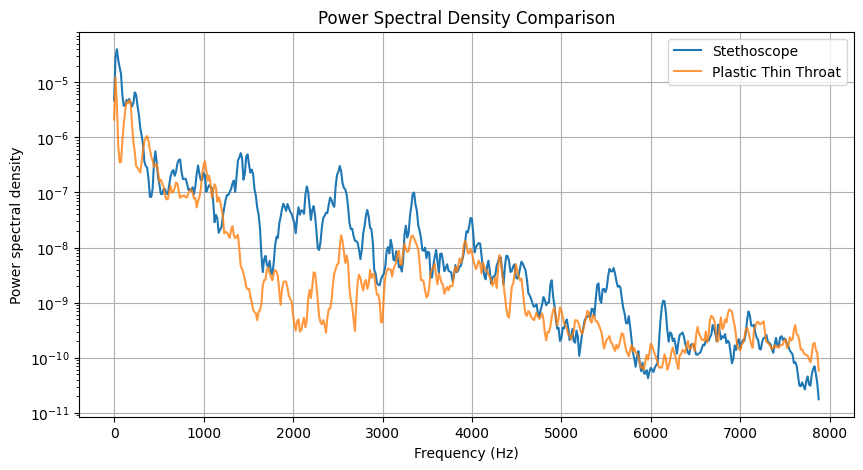

In [6]:
f_stet, Pxx_stet = welch(y_stet, sr_stet, nperseg=1024)
f_plastic, Pxx_plastic = welch(y_plastic, sr_plastic, nperseg=1024)

plt.figure(figsize=(10, 5))
plt.semilogy(f_stet, Pxx_stet, label="Stethoscope")
plt.semilogy(f_plastic, Pxx_plastic, label="Plastic Thin Throat", alpha=0.8)
plt.title("Power Spectral Density Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectral density")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
print("Gold standard (stethoscope) recording:")
display(Audio(y_stet, rate=sr_stet))

print("Plastic thin throat recording:")
display(Audio(y_plastic, rate=sr_plastic))

Gold standard (stethoscope) recording:


Plastic thin throat recording:


In [7]:
centroid_stet = np.mean(librosa.feature.spectral_centroid(y=y_stet, sr=sr_stet))
centroid_plastic = np.mean(librosa.feature.spectral_centroid(y=y_plastic, sr=sr_plastic))
bw_stet = np.mean(librosa.feature.spectral_bandwidth(y=y_stet, sr=sr_stet))
bw_plastic = np.mean(librosa.feature.spectral_bandwidth(y=y_plastic, sr=sr_plastic))

print(f"Spectral centroid (stethoscope): {centroid_stet:.1f} Hz")
print(f"Spectral centroid (plastic): {centroid_plastic:.1f} Hz")
print(f"Bandwidth (stethoscope): {bw_stet:.1f} Hz")
print(f"Bandwidth (plastic): {bw_plastic:.1f} Hz")


Spectral centroid (stethoscope): 917.6 Hz
Spectral centroid (plastic): 908.5 Hz
Bandwidth (stethoscope): 1545.1 Hz
Bandwidth (plastic): 1599.6 Hz
